In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import sys
import os

# Set working directory to your project folder
project_path = '/content/drive/MyDrive/Github/Diabetes_Predictor_MVP'
os.chdir(project_path)

# Add 'app' folder to system path so imports like 'from app.utils import ...' work
sys.path.append(os.path.join(project_path, 'app'))

# Confirm working directory
print("Working directory set to:", os.getcwd())

Working directory set to: /content/drive/MyDrive/Github/Diabetes_Predictor_MVP


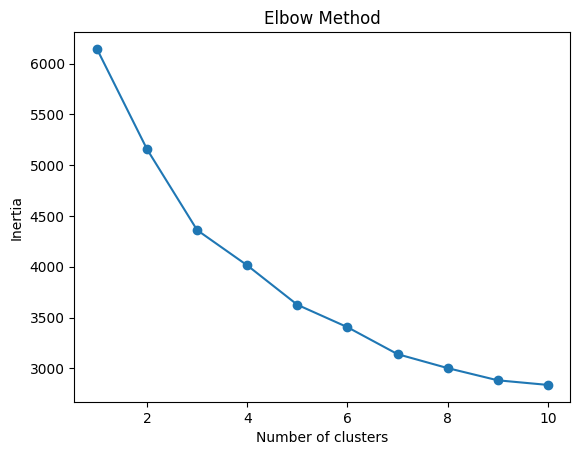

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pickle

# Load dataset
df = pd.read_csv('../Diabetes_Predictor_MVP/data/raw/diabetes.csv')
X = df.drop('Outcome', axis=1)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal clusters using Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Apply KMeans
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_

# Save model
pickle.dump(kmeans, open('../Diabetes_Predictor_MVP/models/kmeans_model.pkl', 'wb'))